# DAY0 - Looking for Dataset + Problem 

In [1]:
# needed to make web requests
import requests

#store the data we get as a dataframe
import pandas as pd

#convert the response as a structured json
import json

#mathematical operations on lists
import numpy as np

#parse the datetimes we get from NOAA
from datetime import datetime



In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import timedelta
from sklearn.metrics import accuracy_score

In [52]:
#add the access token you got from NOAA
Token = 'xKIlBHakeOEdyBfhPkKcDKyLzjofRpNY'

#MIAMI INTERNATIONAL AIRPORT, FL US station
station_id = 'GHCND:USW00012839'

# https://www.ncdc.noaa.gov/cdo-web/datatools/findstation

In [53]:
#initialize lists to store data
dates_temp = []
dates_prcp = []
temps = []
prcp = []

#for each year from 2015-2019 ...
for year in range(2015, 2020):
    year = str(year)
    print('working on year '+year)
    
    #make the api call
    r = requests.get('https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=TAVG&limit=1000&stationid=GHCND:USW00023129&startdate='+year+'-01-01&enddate='+year+'-12-31', headers={'token':Token})
    #load the api response as a json
    d = json.loads(r.text)
    #get all items in the response which are average temperature readings
    avg_temps = [item for item in d['results'] if item['datatype']=='TAVG']
    #get the date field from all average temperature readings
    dates_temp += [item['date'] for item in avg_temps]
    #get the actual average temperature from all average temperature readings
    temps += [item['value'] for item in avg_temps]

working on year 2015
working on year 2016
working on year 2017
working on year 2018
working on year 2019


In [54]:
#initialize dataframe
df_temp = pd.DataFrame()

#populate date and average temperature fields (cast string date to datetime and convert temperature from tenths of Celsius to Fahrenheit)
df_temp['date'] = [datetime.strptime(d, "%Y-%m-%dT%H:%M:%S") for d in dates_temp]
df_temp['avgTemp'] = [float(v)/10.0*1.8 + 32 for v in temps]

In [55]:
df_temp['date'].head()

0   2015-01-01
1   2015-01-02
2   2015-01-03
3   2015-01-04
4   2015-01-05
Name: date, dtype: datetime64[ns]

In [56]:
df_temp['avgTemp'].head()

0    46.58
1    48.02
2    49.82
3    52.16
4    58.64
Name: avgTemp, dtype: float64

In [ ]:
# ...not taking this approach...

# new approach ->

# DAY1 - Brainstorming & Data Preparation

    Idea generation & planning
    Data gathering & cleaning
    Data storage

# Let's start with the Solar Dataset


In [3]:
import pandas as pd

solar = pd.read_csv('/Users/gracemartinez/Downloads/solar.csv')
solar.head()

,Catalog Number,Calendar Date,Eclipse Time,Delta T (s),Lunation Number,Saros Number,Eclipse Type,Gamma,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration
0,1,-1999 June 12,03:14:51,46438,-49456,5,T,-0.2701,1.0733,6.0N,33.3W,74,344,247,06m37s
1,2,-1999 December 5,23:45:23,46426,-49450,10,A,-0.2317,0.9382,32.9S,10.8E,76,21,236,06m44s
2,3,-1998 June 1,18:09:16,46415,-49444,15,T,0.4994,1.0284,46.2N,83.4E,60,151,111,02m15s
3,4,-1998 November 25,05:57:03,46403,-49438,20,A,-0.9045,0.9806,67.8S,143.8W,25,74,162,01m14s
4,5,-1997 April 22,13:19:56,46393,-49433,-13,P,-1.4670,0.1611,60.6S,106.4W,0,281,NaN,NaN


In [4]:
solar.shape

(11898, 15)

In [5]:
solar.columns

Index(['Catalog Number', 'Calendar Date', 'Eclipse Time', 'Delta T (s)',
       'Lunation Number', 'Saros Number', 'Eclipse Type', 'Gamma',
       'Eclipse Magnitude', 'Latitude', 'Longitude', 'Sun Altitude',
       'Sun Azimuth', 'Path Width (km)', 'Central Duration'],
      dtype='object')

In [6]:
# replacing space between words with underscore

solar.columns = solar.columns.str.replace(' ','_')
solar.columns

Index(['Catalog_Number', 'Calendar_Date', 'Eclipse_Time', 'Delta_T_(s)',
       'Lunation_Number', 'Saros_Number', 'Eclipse_Type', 'Gamma',
       'Eclipse_Magnitude', 'Latitude', 'Longitude', 'Sun_Altitude',
       'Sun_Azimuth', 'Path_Width_(km)', 'Central_Duration'],
      dtype='object')

In [7]:
#  verifying types of data
solar.dtypes

Catalog_Number         int64
Calendar_Date         object
Eclipse_Time          object
Delta_T_(s)            int64
Lunation_Number        int64
Saros_Number           int64
Eclipse_Type          object
Gamma                float64
Eclipse_Magnitude    float64
Latitude              object
Longitude             object
Sun_Altitude           int64
Sun_Azimuth            int64
Path_Width_(km)       object
Central_Duration      object
dtype: object

In [8]:
# need to know what each column means/represents to know if they're a correct type

In [9]:
'''
- Need to change:

Calendar_Date         object -> (-)Y/M/D, ex. -1997 May 22
Eclipse_Time          object -> Date

- will drop for python, have again for tableau:

Latitude              object, separate into 2 columns: decimal# & Letter
Longitude             object, separate into 2 columns: decimal# & Letter

- i dont think i need them:     need to see the correlation with the Y

Path_Width_(km)       object    1/3 of null values. 
Central_Duration      object    1/3 of null values. 

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-9-a5375aae5321>, line 15)

In [10]:
# how many of each type in the data
solar['Eclipse_Type'].value_counts()

P     3875
A     3755
T     3049
H      502
Pb     163
Pe     162
Tm      72
Am      72
An      36
A+      34
A-      34
H3      26
As      25
H2      24
T-      17
Hm      17
Tn      14
Ts      12
T+       9
Name: Eclipse_Type, dtype: int64

In [11]:
# we will data clean by putting all common categories together 

In [12]:
# only 4 types of lunar eclipse: P, A, T, H 

def eclipseClean(x):
    if 'P' in x:
        return('P')
    if 'A' in x:
        return('A')
    if 'T' in x:
        return('T')
    if 'H' in x:
        return('H')
    
    

In [13]:
# map function; recount the types in new category types
solar['Eclipse_Type'] = list(map(eclipseClean,solar['Eclipse_Type']))
solar['Eclipse_Type'].value_counts()

P    4200
A    3956
T    3173
H     569
Name: Eclipse_Type, dtype: int64

In [14]:
len(solar['Eclipse_Type'].value_counts())

4

In [15]:
# so now we have the 4 main categories of 'Eclipse Type', 
# but we can drop 'H' column because it's "Hybrid or Annular/Total Eclipse."
# and we're only dealing with Partial, Annular, or Total Eclipses.

In [16]:
# we're removing the hybrid category type 'H'
# because the data will be compromised/disparity. might give unnecessary outliers

solar = solar.drop(solar[solar.Eclipse_Type == 'H'].index)

In [17]:
# recount the new 3 categories
solar['Eclipse_Type'].value_counts()

P    4200
A    3956
T    3173
Name: Eclipse_Type, dtype: int64

In [18]:
# now let's look at the Latitude & Longitude columns

In [19]:
solar.Latitude.head()

0     6.0N
1    32.9S
2    46.2N
3    67.8S
4    60.6S
Name: Latitude, dtype: object

In [20]:
# Using regex to separate Latitude & Longitude columns

import re

solar['Latitude_Number'] = solar['Latitude'].str.replace('([A-Z]+)', '')
solar['Latitude_Letter'] = solar['Latitude'].str.extract('([A-Z]+)')
solar.head()

,Catalog_Number,Calendar_Date,Eclipse_Time,Delta_T_(s),Lunation_Number,Saros_Number,Eclipse_Type,Gamma,Eclipse_Magnitude,Latitude,Longitude,Sun_Altitude,Sun_Azimuth,Path_Width_(km),Central_Duration,Latitude_Number,Latitude_Letter
0,1,-1999 June 12,03:14:51,46438,-49456,5,T,-0.2701,1.0733,6.0N,33.3W,74,344,247,06m37s,6.0,N
1,2,-1999 December 5,23:45:23,46426,-49450,10,A,-0.2317,0.9382,32.9S,10.8E,76,21,236,06m44s,32.9,S
2,3,-1998 June 1,18:09:16,46415,-49444,15,T,0.4994,1.0284,46.2N,83.4E,60,151,111,02m15s,46.2,N
3,4,-1998 November 25,05:57:03,46403,-49438,20,A,-0.9045,0.9806,67.8S,143.8W,25,74,162,01m14s,67.8,S
4,5,-1997 April 22,13:19:56,46393,-49433,-13,P,-1.4670,0.1611,60.6S,106.4W,0,281,NaN,NaN,60.6,S


In [21]:
# Same with Logitude

solar['Longitude_Number'] = solar['Longitude'].str.replace('([A-Z]+)', '')
solar['Longitude_Letter'] = solar['Longitude'].str.extract('([A-Z]+)')
solar.head()

,Catalog_Number,Calendar_Date,Eclipse_Time,Delta_T_(s),Lunation_Number,Saros_Number,Eclipse_Type,Gamma,Eclipse_Magnitude,Latitude,Longitude,Sun_Altitude,Sun_Azimuth,Path_Width_(km),Central_Duration,Latitude_Number,Latitude_Letter,Longitude_Number,Longitude_Letter
0,1,-1999 June 12,03:14:51,46438,-49456,5,T,-0.2701,1.0733,6.0N,33.3W,74,344,247,06m37s,6.0,N,33.3,W
1,2,-1999 December 5,23:45:23,46426,-49450,10,A,-0.2317,0.9382,32.9S,10.8E,76,21,236,06m44s,32.9,S,10.8,E
2,3,-1998 June 1,18:09:16,46415,-49444,15,T,0.4994,1.0284,46.2N,83.4E,60,151,111,02m15s,46.2,N,83.4,E
3,4,-1998 November 25,05:57:03,46403,-49438,20,A,-0.9045,0.9806,67.8S,143.8W,25,74,162,01m14s,67.8,S,143.8,W
4,5,-1997 April 22,13:19:56,46393,-49433,-13,P,-1.4670,0.1611,60.6S,106.4W,0,281,NaN,NaN,60.6,S,106.4,W


In [22]:
# Dropping original Latitude & Longitude columns 

solar.drop(columns =["Latitude", "Longitude"], inplace = True) 
solar.head()

,Catalog_Number,Calendar_Date,Eclipse_Time,Delta_T_(s),Lunation_Number,Saros_Number,Eclipse_Type,Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth,Path_Width_(km),Central_Duration,Latitude_Number,Latitude_Letter,Longitude_Number,Longitude_Letter
0,1,-1999 June 12,03:14:51,46438,-49456,5,T,-0.2701,1.0733,74,344,247,06m37s,6.0,N,33.3,W
1,2,-1999 December 5,23:45:23,46426,-49450,10,A,-0.2317,0.9382,76,21,236,06m44s,32.9,S,10.8,E
2,3,-1998 June 1,18:09:16,46415,-49444,15,T,0.4994,1.0284,60,151,111,02m15s,46.2,N,83.4,E
3,4,-1998 November 25,05:57:03,46403,-49438,20,A,-0.9045,0.9806,25,74,162,01m14s,67.8,S,143.8,W
4,5,-1997 April 22,13:19:56,46393,-49433,-13,P,-1.4670,0.1611,0,281,NaN,NaN,60.6,S,106.4,W


In [23]:
solar.isnull().sum()

Catalog_Number          0
Calendar_Date           0
Eclipse_Time            0
Delta_T_(s)             0
Lunation_Number         0
Saros_Number            0
Eclipse_Type            0
Gamma                   0
Eclipse_Magnitude       0
Sun_Altitude            0
Sun_Azimuth             0
Path_Width_(km)      4200
Central_Duration     4200
Latitude_Number         0
Latitude_Letter         0
Longitude_Number        0
Longitude_Letter        0
dtype: int64

In [24]:
# how much correlation do the columns with Null have

solar.isnull().sum() / solar.shape[0]

Catalog_Number       0.00000
Calendar_Date        0.00000
Eclipse_Time         0.00000
Delta_T_(s)          0.00000
Lunation_Number      0.00000
Saros_Number         0.00000
Eclipse_Type         0.00000
Gamma                0.00000
Eclipse_Magnitude    0.00000
Sun_Altitude         0.00000
Sun_Azimuth          0.00000
Path_Width_(km)      0.37073
Central_Duration     0.37073
Latitude_Number      0.00000
Latitude_Letter      0.00000
Longitude_Number     0.00000
Longitude_Letter     0.00000
dtype: float64

In [25]:
# Need to drop 2 columns with high missing null values

solar = solar.drop(["Path_Width_(km)", "Central_Duration"], axis=1)

In [26]:
# Also drop 'Catalog_Number' column since it is just like the index, hence unnecessary

solar = solar.drop(["Catalog_Number"], axis=1)

In [27]:
solar.head()

,Calendar_Date,Eclipse_Time,Delta_T_(s),Lunation_Number,Saros_Number,Eclipse_Type,Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth,Latitude_Number,Latitude_Letter,Longitude_Number,Longitude_Letter
0,-1999 June 12,03:14:51,46438,-49456,5,T,-0.2701,1.0733,74,344,6.0,N,33.3,W
1,-1999 December 5,23:45:23,46426,-49450,10,A,-0.2317,0.9382,76,21,32.9,S,10.8,E
2,-1998 June 1,18:09:16,46415,-49444,15,T,0.4994,1.0284,60,151,46.2,N,83.4,E
3,-1998 November 25,05:57:03,46403,-49438,20,A,-0.9045,0.9806,25,74,67.8,S,143.8,W
4,-1997 April 22,13:19:56,46393,-49433,-13,P,-1.4670,0.1611,0,281,60.6,S,106.4,W


In [28]:
len(solar.columns)

14

In [29]:
# make new column with no negative symbol

def c0(x):
    if '-' in x:
        x = x.replace('-','')
    return x

In [30]:
solar['Calendar_Date_Clean'] = list(map(c0, solar['Calendar_Date']))
solar.head()

,Calendar_Date,Eclipse_Time,Delta_T_(s),Lunation_Number,Saros_Number,Eclipse_Type,Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth,Latitude_Number,Latitude_Letter,Longitude_Number,Longitude_Letter,Calendar_Date_Clean
0,-1999 June 12,03:14:51,46438,-49456,5,T,-0.2701,1.0733,74,344,6.0,N,33.3,W,1999 June 12
1,-1999 December 5,23:45:23,46426,-49450,10,A,-0.2317,0.9382,76,21,32.9,S,10.8,E,1999 December 5
2,-1998 June 1,18:09:16,46415,-49444,15,T,0.4994,1.0284,60,151,46.2,N,83.4,E,1998 June 1
3,-1998 November 25,05:57:03,46403,-49438,20,A,-0.9045,0.9806,25,74,67.8,S,143.8,W,1998 November 25
4,-1997 April 22,13:19:56,46393,-49433,-13,P,-1.4670,0.1611,0,281,60.6,S,106.4,W,1997 April 22


In [31]:
# Look for months only

import re 
re.findall('[A-z]+' , solar['Calendar_Date_Clean'][0])

['June']

In [32]:
# too much time trying to convert to correct datetime format, 
# used simple regex to remove negative symbol and extracted month


def c1(x):
    if '-' in x:
        x = x.replace('-','')
    return((re.findall('[A-z]+', x))[0])

In [33]:
solar['Calendar_Date_Month'] = list(map(c1, solar['Calendar_Date']))
solar['Calendar_Date_Month']

0            June
1        December
2            June
3        November
4           April
           ...   
11892        June
11893    December
11894         May
11895     October
11896       April
Name: Calendar_Date_Month, Length: 11329, dtype: object

In [34]:
# Look for years only

def c2(x):
    if '-' in x:
        x = x.replace('-','')
    temp = re.findall('\d\d\d\d', x)
    if len(temp)>0:
        return temp[0]
    else:
        return temp

In [35]:
solar['Calendar_Date_Year'] = list(map(c2, solar['Calendar_Date']))
solar.head()

,Calendar_Date,Eclipse_Time,Delta_T_(s),Lunation_Number,Saros_Number,Eclipse_Type,Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth,Latitude_Number,Latitude_Letter,Longitude_Number,Longitude_Letter,Calendar_Date_Clean,Calendar_Date_Month,Calendar_Date_Year
0,-1999 June 12,03:14:51,46438,-49456,5,T,-0.2701,1.0733,74,344,6.0,N,33.3,W,1999 June 12,June,1999
1,-1999 December 5,23:45:23,46426,-49450,10,A,-0.2317,0.9382,76,21,32.9,S,10.8,E,1999 December 5,December,1999
2,-1998 June 1,18:09:16,46415,-49444,15,T,0.4994,1.0284,60,151,46.2,N,83.4,E,1998 June 1,June,1998
3,-1998 November 25,05:57:03,46403,-49438,20,A,-0.9045,0.9806,25,74,67.8,S,143.8,W,1998 November 25,November,1998
4,-1997 April 22,13:19:56,46393,-49433,-13,P,-1.4670,0.1611,0,281,60.6,S,106.4,W,1997 April 22,April,1997


In [36]:
# drop original column

solar = solar.drop(["Calendar_Date"], axis=1)

In [37]:
solar.head()

,Eclipse_Time,Delta_T_(s),Lunation_Number,Saros_Number,Eclipse_Type,Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth,Latitude_Number,Latitude_Letter,Longitude_Number,Longitude_Letter,Calendar_Date_Clean,Calendar_Date_Month,Calendar_Date_Year
0,03:14:51,46438,-49456,5,T,-0.2701,1.0733,74,344,6.0,N,33.3,W,1999 June 12,June,1999
1,23:45:23,46426,-49450,10,A,-0.2317,0.9382,76,21,32.9,S,10.8,E,1999 December 5,December,1999
2,18:09:16,46415,-49444,15,T,0.4994,1.0284,60,151,46.2,N,83.4,E,1998 June 1,June,1998
3,05:57:03,46403,-49438,20,A,-0.9045,0.9806,25,74,67.8,S,143.8,W,1998 November 25,November,1998
4,13:19:56,46393,-49433,-13,P,-1.4670,0.1611,0,281,60.6,S,106.4,W,1997 April 22,April,1997


In [38]:
# Use only first 800 rows, encompassing dates beginning from the 17th century. (1601-1999)
# Gregorian calendar starts after 1582

solar[0:800]

,Eclipse_Time,Delta_T_(s),Lunation_Number,Saros_Number,Eclipse_Type,Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth,Latitude_Number,Latitude_Letter,Longitude_Number,Longitude_Letter,Calendar_Date_Clean,Calendar_Date_Month,Calendar_Date_Year
0,03:14:51,46438,-49456,5,T,-0.2701,1.0733,74,344,6.0,N,33.3,W,1999 June 12,June,1999
1,23:45:23,46426,-49450,10,A,-0.2317,0.9382,76,21,32.9,S,10.8,E,1999 December 5,December,1999
2,18:09:16,46415,-49444,15,T,0.4994,1.0284,60,151,46.2,N,83.4,E,1998 June 1,June,1998
3,05:57:03,46403,-49438,20,A,-0.9045,0.9806,25,74,67.8,S,143.8,W,1998 November 25,November,1998
4,13:19:56,46393,-49433,-13,P,-1.4670,0.1611,0,281,60.6,S,106.4,W,1997 April 22,April,1997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,18:55:44,38318,-45131,4,T,0.8141,1.0456,35,167,36.1,N,49.8,E,1649 February 14,February,1649
864,20:14:27,38307,-45125,9,A,-0.9777,0.9237,11,13,57.8,S,22.8,E,1649 August 10,August,1649
865,11:17:57,38296,-45119,14,T,0.1102,1.0577,84,173,14.1,S,173.9,E,1648 February 4,February,1648
866,20:54:51,38286,-45113,19,A,-0.2343,0.9570,77,3,8.7,N,25.2,E,1648 July 29,July,1648


In [39]:
# Saving for future Tableau usage

solar.to_csv('Solar_tableau.csv')

In [40]:
SolarCategoricals = solar.select_dtypes(object)
SolarCategoricals

,Eclipse_Time,Eclipse_Type,Latitude_Number,Latitude_Letter,Longitude_Number,Longitude_Letter,Calendar_Date_Clean,Calendar_Date_Month,Calendar_Date_Year
0,03:14:51,T,6.0,N,33.3,W,1999 June 12,June,1999
1,23:45:23,A,32.9,S,10.8,E,1999 December 5,December,1999
2,18:09:16,T,46.2,N,83.4,E,1998 June 1,June,1998
3,05:57:03,A,67.8,S,143.8,W,1998 November 25,November,1998
4,13:19:56,P,60.6,S,106.4,W,1997 April 22,April,1997
...,...,...,...,...,...,...,...,...,...
11892,14:49:27,P,66.5,S,32.5,W,2998 June 15,June,2998
11893,03:18:31,P,67.2,N,145.0,E,2998 December 10,December,2998
11894,23:23:57,T,71.5,N,177.3,E,2999 May 6,May,2999
11895,09:34:33,A,70.9,S,84.7,W,2999 October 30,October,2999


In [41]:
# Need to convert Latitude_Number & Longitude_Number to float64 type

In [42]:
solar["Latitude_Number"] = pd.to_numeric(solar["Latitude_Number"])
solar.head()

,Eclipse_Time,Delta_T_(s),Lunation_Number,Saros_Number,Eclipse_Type,Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth,Latitude_Number,Latitude_Letter,Longitude_Number,Longitude_Letter,Calendar_Date_Clean,Calendar_Date_Month,Calendar_Date_Year
0,03:14:51,46438,-49456,5,T,-0.2701,1.0733,74,344,6.0,N,33.3,W,1999 June 12,June,1999
1,23:45:23,46426,-49450,10,A,-0.2317,0.9382,76,21,32.9,S,10.8,E,1999 December 5,December,1999
2,18:09:16,46415,-49444,15,T,0.4994,1.0284,60,151,46.2,N,83.4,E,1998 June 1,June,1998
3,05:57:03,46403,-49438,20,A,-0.9045,0.9806,25,74,67.8,S,143.8,W,1998 November 25,November,1998
4,13:19:56,46393,-49433,-13,P,-1.4670,0.1611,0,281,60.6,S,106.4,W,1997 April 22,April,1997


In [43]:
solar["Longitude_Number"] = pd.to_numeric(solar["Longitude_Number"])
solar.head()

,Eclipse_Time,Delta_T_(s),Lunation_Number,Saros_Number,Eclipse_Type,Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth,Latitude_Number,Latitude_Letter,Longitude_Number,Longitude_Letter,Calendar_Date_Clean,Calendar_Date_Month,Calendar_Date_Year
0,03:14:51,46438,-49456,5,T,-0.2701,1.0733,74,344,6.0,N,33.3,W,1999 June 12,June,1999
1,23:45:23,46426,-49450,10,A,-0.2317,0.9382,76,21,32.9,S,10.8,E,1999 December 5,December,1999
2,18:09:16,46415,-49444,15,T,0.4994,1.0284,60,151,46.2,N,83.4,E,1998 June 1,June,1998
3,05:57:03,46403,-49438,20,A,-0.9045,0.9806,25,74,67.8,S,143.8,W,1998 November 25,November,1998
4,13:19:56,46393,-49433,-13,P,-1.4670,0.1611,0,281,60.6,S,106.4,W,1997 April 22,April,1997


In [44]:
solar.dtypes

Eclipse_Time            object
Delta_T_(s)              int64
Lunation_Number          int64
Saros_Number             int64
Eclipse_Type            object
Gamma                  float64
Eclipse_Magnitude      float64
Sun_Altitude             int64
Sun_Azimuth              int64
Latitude_Number        float64
Latitude_Letter         object
Longitude_Number       float64
Longitude_Letter        object
Calendar_Date_Clean     object
Calendar_Date_Month     object
Calendar_Date_Year      object
dtype: object

In [45]:
SolarCategoricals = solar.select_dtypes(object)
SolarCategoricals.head()

,Eclipse_Time,Eclipse_Type,Latitude_Letter,Longitude_Letter,Calendar_Date_Clean,Calendar_Date_Month,Calendar_Date_Year
0,03:14:51,T,N,W,1999 June 12,June,1999
1,23:45:23,A,S,E,1999 December 5,December,1999
2,18:09:16,T,N,E,1998 June 1,June,1998
3,05:57:03,A,S,W,1998 November 25,November,1998
4,13:19:56,P,S,W,1997 April 22,April,1997


In [46]:
len(SolarCategoricals.columns)

7

In [47]:
# Total columns

len(solar.dtypes)

16

In [48]:
solar = solar.drop(['Latitude_Number', 'Longitude_Number', 'Latitude_Letter', 'Longitude_Letter', 'Eclipse_Time'], axis=1)

In [49]:
SolarNumericals = solar._get_numeric_data()
SolarNumericals

,Delta_T_(s),Lunation_Number,Saros_Number,Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth
0,46438,-49456,5,-0.2701,1.0733,74,344
1,46426,-49450,10,-0.2317,0.9382,76,21
2,46415,-49444,15,0.4994,1.0284,60,151
3,46403,-49438,20,-0.9045,0.9806,25,74
4,46393,-49433,-13,-1.4670,0.1611,0,281
...,...,...,...,...,...,...,...
11892,4410,12349,182,-1.0158,0.9792,0,9
11893,4414,12355,187,1.2838,0.4773,0,179
11894,4417,12360,154,0.8388,1.0566,33,146
11895,4420,12366,159,-1.0023,0.9586,0,137


In [50]:
# use corr function, will untilize number of numerical columns 

S_corr_matrix = SolarNumericals.corr()
S_corr_matrix.head()

,Delta_T_(s),Lunation_Number,Saros_Number,Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth
Delta_T_(s),1.000000,-0.895389,-0.859854,-0.001714,-0.017312,-0.006321,0.001028
Lunation_Number,-0.895389,1.000000,0.964364,-0.000305,0.007834,0.006855,0.000447
Saros_Number,-0.859854,0.964364,1.000000,-0.001338,0.006829,0.006747,-0.039708
Gamma,-0.001714,-0.000305,-0.001338,1.000000,0.004195,0.001739,-0.004446
Eclipse_Magnitude,-0.017312,0.007834,0.006829,0.004195,1.000000,0.690416,0.003867


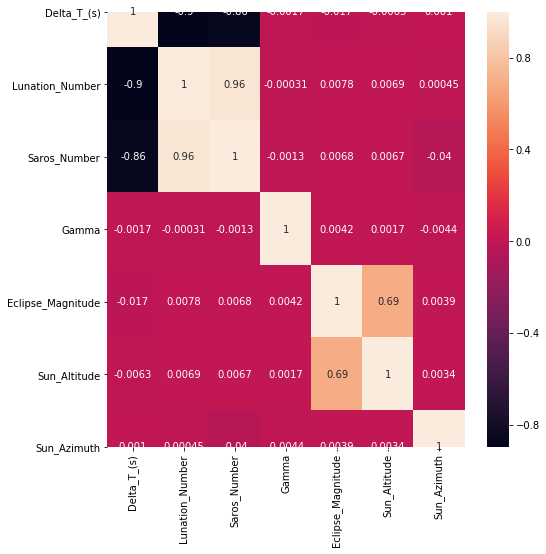

In [51]:
# set fig size to have better readibility of heatmap

fig, ax = plt.subplots(figsize=(8,8))
S_heatmap = sns.heatmap(S_corr_matrix, annot =True, ax=ax)
S_heatmap

In [52]:
# Due to high correlation, we are dropping 'Saros_Number' & 'Lunation_Number'

solar = solar.drop(['Saros_Number', 'Lunation_Number'], axis=1)


In [53]:
# update 

SolarNumericals = solar._get_numeric_data()
SolarNumericals

,Delta_T_(s),Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth
0,46438,-0.2701,1.0733,74,344
1,46426,-0.2317,0.9382,76,21
2,46415,0.4994,1.0284,60,151
3,46403,-0.9045,0.9806,25,74
4,46393,-1.4670,0.1611,0,281
...,...,...,...,...,...
11892,4410,-1.0158,0.9792,0,9
11893,4414,1.2838,0.4773,0,179
11894,4417,0.8388,1.0566,33,146
11895,4420,-1.0023,0.9586,0,137


In [54]:
S_corr_matrix = SolarNumericals.corr()
S_corr_matrix.head()

,Delta_T_(s),Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth
Delta_T_(s),1.000000,-0.001714,-0.017312,-0.006321,0.001028
Gamma,-0.001714,1.000000,0.004195,0.001739,-0.004446
Eclipse_Magnitude,-0.017312,0.004195,1.000000,0.690416,0.003867
Sun_Altitude,-0.006321,0.001739,0.690416,1.000000,0.003370
Sun_Azimuth,0.001028,-0.004446,0.003867,0.003370,1.000000


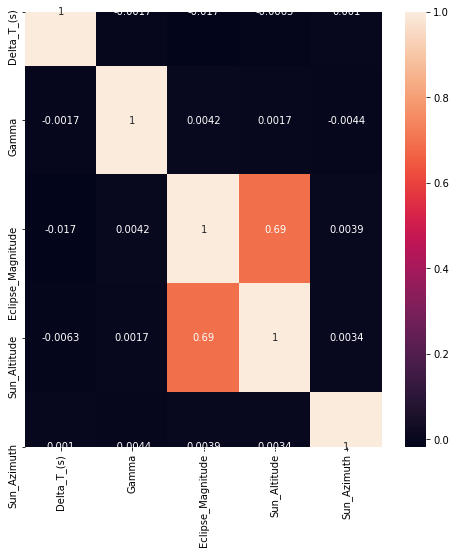

In [55]:
fig, ax = plt.subplots(figsize=(8,8))
S_heatmap = sns.heatmap(S_corr_matrix, annot =True, ax=ax)
S_heatmap

([0, 1, 2], <a list of 3 Text xticklabel objects>)

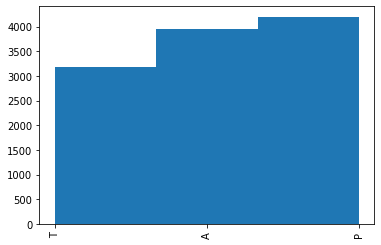

In [56]:
plt.hist(solar["Eclipse_Type"], bins = len(solar["Eclipse_Type"].unique()))
plt.xticks(rotation='vertical')

In [57]:
# normalize numerical values

import pandas as pd
from sklearn import preprocessing

x = SolarNumericals.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [58]:
df.head()

,0,1,2,3,4
0,1.000000,0.413715,0.992601,0.822222,0.955556
1,0.999742,0.425946,0.867659,0.844444,0.058333
2,0.999505,0.658810,0.951077,0.666667,0.419444
3,0.999246,0.211651,0.906871,0.277778,0.205556
4,0.999031,0.032488,0.148987,0.000000,0.780556


In [59]:
solar.head()

,Delta_T_(s),Eclipse_Type,Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth,Calendar_Date_Clean,Calendar_Date_Month,Calendar_Date_Year
0,46438,T,-0.2701,1.0733,74,344,1999 June 12,June,1999
1,46426,A,-0.2317,0.9382,76,21,1999 December 5,December,1999
2,46415,T,0.4994,1.0284,60,151,1998 June 1,June,1998
3,46403,A,-0.9045,0.9806,25,74,1998 November 25,November,1998
4,46393,P,-1.4670,0.1611,0,281,1997 April 22,April,1997


In [60]:
# Now let's play with the categories!

In [61]:
solar.dtypes

Delta_T_(s)              int64
Eclipse_Type            object
Gamma                  float64
Eclipse_Magnitude      float64
Sun_Altitude             int64
Sun_Azimuth              int64
Calendar_Date_Clean     object
Calendar_Date_Month     object
Calendar_Date_Year      object
dtype: object

In [62]:
SolarCategoricals = solar.select_dtypes(object)
SolarCategoricals.head()

,Eclipse_Type,Calendar_Date_Clean,Calendar_Date_Month,Calendar_Date_Year
0,T,1999 June 12,June,1999
1,A,1999 December 5,December,1999
2,T,1998 June 1,June,1998
3,A,1998 November 25,November,1998
4,P,1997 April 22,April,1997


In [63]:
from sklearn import preprocessing

In [64]:
solar.head()

,Delta_T_(s),Eclipse_Type,Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth,Calendar_Date_Clean,Calendar_Date_Month,Calendar_Date_Year
0,46438,T,-0.2701,1.0733,74,344,1999 June 12,June,1999
1,46426,A,-0.2317,0.9382,76,21,1999 December 5,December,1999
2,46415,T,0.4994,1.0284,60,151,1998 June 1,June,1998
3,46403,A,-0.9045,0.9806,25,74,1998 November 25,November,1998
4,46393,P,-1.4670,0.1611,0,281,1997 April 22,April,1997


In [65]:
solar.columns

Index(['Delta_T_(s)', 'Eclipse_Type', 'Gamma', 'Eclipse_Magnitude',
       'Sun_Altitude', 'Sun_Azimuth', 'Calendar_Date_Clean',
       'Calendar_Date_Month', 'Calendar_Date_Year'],
      dtype='object')

In [66]:
# there are 2 categorical & numericals

In [130]:
'''
The Target[Y] is finding the Eclipse_Type
The Features[X] are what will determine the best outcome for Y
need to determine which are the best features to use to get the prediction 
while having a high measurement of acuracy.

We will do a Train/Test Split in order to verify.
'''

'\nThe Target[Y] is finding the Eclipse_Type\nThe Features[X] are what will determine the best outcome for Y\nneed to determine which are the best features to use to get the prediction \nwhile having a high measurement of acuracy.\n\nWe will do a Train/Test Split in order to verify.\n'

In [67]:
solar 

,Delta_T_(s),Eclipse_Type,Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth,Calendar_Date_Clean,Calendar_Date_Month,Calendar_Date_Year
0,46438,T,-0.2701,1.0733,74,344,1999 June 12,June,1999
1,46426,A,-0.2317,0.9382,76,21,1999 December 5,December,1999
2,46415,T,0.4994,1.0284,60,151,1998 June 1,June,1998
3,46403,A,-0.9045,0.9806,25,74,1998 November 25,November,1998
4,46393,P,-1.4670,0.1611,0,281,1997 April 22,April,1997
...,...,...,...,...,...,...,...,...,...
11892,4410,P,-1.0158,0.9792,0,9,2998 June 15,June,2998
11893,4414,P,1.2838,0.4773,0,179,2998 December 10,December,2998
11894,4417,T,0.8388,1.0566,33,146,2999 May 6,May,2999
11895,4420,A,-1.0023,0.9586,0,137,2999 October 30,October,2999


In [68]:
numericals = solar._get_numeric_data()
numericals = pd.DataFrame(numericals)
numericals

,Delta_T_(s),Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth
0,46438,-0.2701,1.0733,74,344
1,46426,-0.2317,0.9382,76,21
2,46415,0.4994,1.0284,60,151
3,46403,-0.9045,0.9806,25,74
4,46393,-1.4670,0.1611,0,281
...,...,...,...,...,...
11892,4410,-1.0158,0.9792,0,9
11893,4414,1.2838,0.4773,0,179
11894,4417,0.8388,1.0566,33,146
11895,4420,-1.0023,0.9586,0,137


In [69]:
# Normalize x values

from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(numericals)
normalized_x = transformer.transform(numericals)
pd.DataFrame(normalized_x)

,0,1,2,3,4
0,0.999971,-0.000006,0.000023,0.001593,0.007408
1,0.999999,-0.000005,0.000020,0.001637,0.000452
2,0.999994,0.000011,0.000022,0.001293,0.003253
3,0.999999,-0.000019,0.000021,0.000539,0.001595
4,0.999982,-0.000032,0.000003,0.000000,0.006057
...,...,...,...,...,...
11324,0.999998,-0.000230,0.000222,0.000000,0.002041
11325,0.999179,0.000291,0.000108,0.000000,0.040519
11326,0.999426,0.000190,0.000239,0.007467,0.033035
11327,0.999520,-0.000227,0.000217,0.000000,0.030981


In [70]:
categoricals = solar.select_dtypes('object')
categoricals = categoricals['Eclipse_Type']
y = categoricals

In [71]:
# importing the necessary libraries

import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [72]:
# defining the target variable (dependent variable) as y

y = solar.Eclipse_Type

In [73]:
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder() 
  
y = le.fit_transform(y)
y

array([2, 0, 2, ..., 2, 0, 2])

In [74]:
# creating training and testing variables
# test_size = the percentage of the data for testing. It’s usually around 80/20 or 70/30. In this case 80/20

X_train, X_test, y_train, y_test = train_test_split(normalized_x, y, test_size=0.2)

In [75]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(9063, 5) (9063,)
(2266, 5) (2266,)


# LINEAR REGRESSION

In [77]:
'''
# fitting the model on the training data


lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

                    # ...nvm i have to use logistic regression for this CLASSIFICATION PROBLEM *eye roll, sweats*
'''

In [78]:
# show first five predicted values

predictions[0:5]

array([0.937903  , 0.93453696, 0.92831039, 0.93739057, 0.9931756 ])

array([0.937903  , 0.93453696, 0.92831039, 0.93739057, 0.9931756 ])

In [79]:
# plotting the model - The line / model

plt.scatter(y_test, predictions)
plt.xlabel(“True_Values”)
plt.ylabel(“Predictions”)

SyntaxError: invalid character in identifier (<ipython-input-79-6ac5b9bd5e8d>, line 4)

SyntaxError: invalid character in identifier (<ipython-input-79-6ac5b9bd5e8d>, line 4)

# LOGISTIC REGRESSION

In [76]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [77]:
# Training the Logistic Regression Model:

In [78]:
# Split data into 'X' features and 'y' target label sets

X = normalized_x
y = le.fit_transform(y)

In [79]:
# Import module to split dataset

from sklearn.model_selection import train_test_split

# Split data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,) # random_state= _no._ simply sets a seed to the random generator, so that your train-test splits are always deterministic. If you don't set a seed, it is different each time.

In [80]:
# Import module for fitting
from sklearn.linear_model import LogisticRegression

# Create instance (i.e. object) of LogisticRegression
logmodel = LogisticRegression()

# Fit the model using the training data
# X_train -> parameter supplies the data features
# y_train -> parameter supplies the target labels
logmodel.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
"""
NOW,
Evaluate the Model by reviewing the classification report or confusion matrix. 
By reviewing these tables, we are able to evaluate the model. 
Below we are able to identify that the model has a precision of 51.4% accuracy. 
To improve this we could gather more data, conduct further feature engineering and more to continue to adjust.
"""

'\nNOW,\nEvaluate the Model by reviewing the classification report or confusion matrix. \nBy reviewing these tables, we are able to evaluate the model. \nBelow we are able to identify that the model has a precision of 51.4% accuracy. \nTo improve this we could gather more data, conduct further feature engineering and more to continue to adjust.\n'

'\nNOW,\nEvaluate the Model by reviewing the classification report or confusion matrix. \nBy reviewing these tables, we are able to evaluate the model. \nBelow we are able to identify that the model has a precision of 51.4% accuracy. \nTo improve this we could gather more data, conduct further feature engineering and more to continue to adjust.\n'

In [81]:
pd.DataFrame(y_test)

,0
0,2
1,0
2,1
3,0
4,2
...,...
2261,2
2262,1
2263,2
2264,2


In [82]:
from sklearn.metrics import classification_report, accuracy_score
predictions = logmodel.predict(pd.DataFrame(X_test))

In [83]:
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.55      0.46      0.50       740
           1       0.53      1.00      0.69       866
           2       0.00      0.00      0.00       660

    accuracy                           0.53      2266
   macro avg       0.36      0.49      0.40      2266
weighted avg       0.38      0.53      0.43      2266

0.5308914386584289


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
# has a 53% model accuracy
# varies everytime i run it.

# RANDOM FOREST ALGORITHM

In [84]:
# Dividing data into training and testing sets:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [85]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [86]:
# training our random forests to solve this classification problem

from sklearn.ensemble import RandomForestClassifier

randomForestClassification = RandomForestClassifier(n_estimators=100,random_state=259)
randomForestClassification.fit(X_train, y_train)
y_pred = randomForestClassification.predict(X_test)

In [87]:
pd.Series(y_pred).value_counts()

1    841
0    796
2    629
dtype: int64

In [93]:
# Evaluating the Algorithm -
"""
For classification problems the metrics used to evaluate an algorithm are 
accuracy, confusion matrix, precision recall, and F1 values. (also known as balanced F-score or F-measure. The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.)
Executing the following script to find these values:
"""

'\nFor classification problems the metrics used to evaluate an algorithm are \naccuracy, confusion matrix, precision recall, and F1 values. (also known as balanced F-score or F-measure. The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.)\nExecuting the following script to find these values:\n'

'\nFor classification problems the metrics used to evaluate an algorithm are \naccuracy, confusion matrix, precision recall, and F1 values. (also known as balanced F-score or F-measure. The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.)\nExecuting the following script to find these values:\n'

In [88]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

# The accuracy achieved for by our random forest classifier with 100 trees is 85%. 
# varies everytime i run it.

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       780
           1       0.98      1.00      0.99       828
           2       0.72      0.69      0.70       658

    accuracy                           0.83      2266
   macro avg       0.82      0.81      0.81      2266
weighted avg       0.82      0.83      0.82      2266

0.8256840247131509


In [89]:
randomForestClassification.feature_importances_

array([0.08918454, 0.11540668, 0.16790762, 0.53559461, 0.09190655])

# SVM ALGORITHM - Support Vector Machine / Classification

In [90]:
# X = normalized_x
# y = le.fit_transform(y)

In [91]:
# Fitting a Support Vector Machine
# import support vector classifier 

from sklearn.svm import SVC # "Support Vector Classifier" 
clf = SVC(kernel='linear') 
  
# fitting x samples and y classes 
clf.fit(X, y) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [92]:
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

# The accuracy achieved by our svm classifier is 37%. 
# varies everytime i run it.

              precision    recall  f1-score   support

           0       0.34      0.27      0.30       780
           1       0.37      0.74      0.50       828
           2       0.00      0.00      0.00       658

    accuracy                           0.36      2266
   macro avg       0.24      0.34      0.27      2266
weighted avg       0.25      0.36      0.29      2266

0.3645189761694616


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# NOW LUNAR DATASET 

In [4]:
lunar = pd.read_csv('/Users/gracemartinez/Downloads/lunar.csv')
lunar.head()

,Catalog Number,Calendar Date,Eclipse Time,Delta T (s),Lunation Number,Saros Number,Eclipse Type,Quincena Solar Eclipse,Gamma,Penumbral Magnitude,Umbral Magnitude,Latitude,Longitude,Penumbral Eclipse Duration (m),Partial Eclipse Duration (m),Total Eclipse Duration (m)
0,1,-1999 June 26,14:13:28,46437,-49456,17,N,t-,-1.0981,0.8791,-0.1922,24S,22W,268.8,-,-
1,2,-1999 November 21,20:23:49,46427,-49451,-16,N,-a,-1.1155,0.8143,-0.1921,15N,98W,233.4,-,-
2,3,-1998 May 17,05:47:36,46416,-49445,-11,P,-t,0.8988,1.2105,0.2069,13S,89E,281.7,102.7,-
3,4,-1998 November 11,05:15:58,46404,-49439,-6,P,-a,-0.4644,2.0382,0.9740,12N,113E,343.4,200.8,-
4,5,-1997 May 6,18:57:01,46392,-49433,-1,T+,pp,0.1003,2.6513,1.6963,11S,92W,322.8,213.5,98.2


In [5]:
lunar.shape

(12064, 16)

In [6]:
lunar.columns

Index(['Catalog Number', 'Calendar Date', 'Eclipse Time', 'Delta T (s)',
       'Lunation Number', 'Saros Number', 'Eclipse Type',
       'Quincena Solar Eclipse', 'Gamma', 'Penumbral Magnitude',
       'Umbral Magnitude', 'Latitude', 'Longitude',
       'Penumbral Eclipse Duration (m)', 'Partial Eclipse Duration (m)',
       'Total Eclipse Duration (m)'],
      dtype='object')

In [7]:
lunar.columns = lunar.columns.str.replace(' ','_')
lunar.columns

Index(['Catalog_Number', 'Calendar_Date', 'Eclipse_Time', 'Delta_T_(s)',
       'Lunation_Number', 'Saros_Number', 'Eclipse_Type',
       'Quincena_Solar_Eclipse', 'Gamma', 'Penumbral_Magnitude',
       'Umbral_Magnitude', 'Latitude', 'Longitude',
       'Penumbral_Eclipse_Duration_(m)', 'Partial_Eclipse_Duration_(m)',
       'Total_Eclipse_Duration_(m)'],
      dtype='object')

In [8]:
# number of columns of data
len(lunar.columns)

16

In [9]:
# different types of each column
lunar.dtypes

Catalog_Number                      int64
Calendar_Date                      object
Eclipse_Time                       object
Delta_T_(s)                         int64
Lunation_Number                     int64
Saros_Number                        int64
Eclipse_Type                       object
Quincena_Solar_Eclipse             object
Gamma                             float64
Penumbral_Magnitude               float64
Umbral_Magnitude                  float64
Latitude                           object
Longitude                          object
Penumbral_Eclipse_Duration_(m)    float64
Partial_Eclipse_Duration_(m)       object
Total_Eclipse_Duration_(m)         object
dtype: object

In [10]:
# need to know what each column mean/represents to know if they're a correct type

In [11]:
# amount of different individual types of each lunar type
lunar['Eclipse_Type'].value_counts()

P     4207
N     4020
T     1405
T+    1042
T-    1032
Nx     141
Ne     115
Nb     102
Name: Eclipse_Type, dtype: int64

In [12]:
# lenght of 
len(lunar['Eclipse_Type'].value_counts())

8

In [13]:
# only 3 types of lunar eclipse: N, P, T

def eclipsetypeClean(x):
    if 'N' in x:
        return('N')
    if 'P' in x:
        return('P')
    if 'T' in x:
        return('T')


In [14]:
# map function to clean up the amount of different types
lunar['Eclipse_Type'] = list(map(eclipsetypeClean,lunar['Eclipse_Type']))

In [15]:
# recounting to make sure the different type of lunar types are accounted for
lunar['Eclipse_Type'].value_counts()

N    4378
P    4207
T    3479
Name: Eclipse_Type, dtype: int64

In [16]:
# amount of different types of lunar eclipses
len(lunar['Eclipse_Type'].value_counts())

3

In [17]:
# so there would be 3 different categories of 'Eclipse Type'

In [18]:
lunar.isnull().sum()

# there are no missing values

Catalog_Number                    0
Calendar_Date                     0
Eclipse_Time                      0
Delta_T_(s)                       0
Lunation_Number                   0
Saros_Number                      0
Eclipse_Type                      0
Quincena_Solar_Eclipse            0
Gamma                             0
Penumbral_Magnitude               0
Umbral_Magnitude                  0
Latitude                          0
Longitude                         0
Penumbral_Eclipse_Duration_(m)    0
Partial_Eclipse_Duration_(m)      0
Total_Eclipse_Duration_(m)        0
dtype: int64

In [19]:
# not necessary for estimation of problem in python

lunar = lunar.drop(["Latitude", "Longitude"], axis=1)

In [20]:
lunar.head()

,Catalog_Number,Calendar_Date,Eclipse_Time,Delta_T_(s),Lunation_Number,Saros_Number,Eclipse_Type,Quincena_Solar_Eclipse,Gamma,Penumbral_Magnitude,Umbral_Magnitude,Penumbral_Eclipse_Duration_(m),Partial_Eclipse_Duration_(m),Total_Eclipse_Duration_(m)
0,1,-1999 June 26,14:13:28,46437,-49456,17,N,t-,-1.0981,0.8791,-0.1922,268.8,-,-
1,2,-1999 November 21,20:23:49,46427,-49451,-16,N,-a,-1.1155,0.8143,-0.1921,233.4,-,-
2,3,-1998 May 17,05:47:36,46416,-49445,-11,P,-t,0.8988,1.2105,0.2069,281.7,102.7,-
3,4,-1998 November 11,05:15:58,46404,-49439,-6,P,-a,-0.4644,2.0382,0.9740,343.4,200.8,-
4,5,-1997 May 6,18:57:01,46392,-49433,-1,T,pp,0.1003,2.6513,1.6963,322.8,213.5,98.2


In [21]:
len(lunar.columns)

14

In [22]:
LunarCategoricals = lunar.select_dtypes(object)
LunarCategoricals

,Calendar_Date,Eclipse_Time,Eclipse_Type,Quincena_Solar_Eclipse,Partial_Eclipse_Duration_(m),Total_Eclipse_Duration_(m)
0,-1999 June 26,14:13:28,N,t-,-,-
1,-1999 November 21,20:23:49,N,-a,-,-
2,-1998 May 17,05:47:36,P,-t,102.7,-
3,-1998 November 11,05:15:58,P,-a,200.8,-
4,-1997 May 6,18:57:01,T,pp,213.5,98.2
...,...,...,...,...,...,...
12059,2999 May 21,13:21:13,P,t-,204.2,-
12060,2999 November 14,16:41:25,T,a-,189.1,18.5
12061,3000 May 10,15:00:16,N,t-,-,-
12062,3000 October 5,17:10:38,N,-h,-,-


In [23]:
len(LunarCategoricals.columns)

6

In [24]:
LunarNumericals = lunar._get_numeric_data()
LunarNumericals

,Catalog_Number,Delta_T_(s),Lunation_Number,Saros_Number,Gamma,Penumbral_Magnitude,Umbral_Magnitude,Penumbral_Eclipse_Duration_(m)
0,1,46437,-49456,17,-1.0981,0.8791,-0.1922,268.8
1,2,46427,-49451,-16,-1.1155,0.8143,-0.1921,233.4
2,3,46416,-49445,-11,0.8988,1.2105,0.2069,281.7
3,4,46404,-49439,-6,-0.4644,2.0382,0.9740,343.4
4,5,46392,-49433,-1,0.1003,2.6513,1.6963,322.8
...,...,...,...,...,...,...,...,...
12059,12060,4417,12360,166,0.4971,1.9853,0.9069,356.7
12060,12061,4421,12366,171,-0.4669,1.9868,1.0153,308.0
12061,12062,4424,12372,176,1.2117,0.6604,-0.3907,230.6
12062,12063,4427,12377,143,1.5497,0.0329,-1.0039,53.5


In [25]:
len(LunarNumericals.columns)

8

In [26]:
L_corr_matrix = LunarNumericals.corr()

In [27]:
# set fig size to have better readibility of heatmap

fig, ax = plt.subplots(figsize=(8,8))
L_heatmap = sns.heatmap(L_corr_matrix, annot =True, ax=ax)
L_heatmap

NameError: name 'plt' is not defined

In [28]:
plt.hist(lunar["Eclipse_Type"], bins = len(lunar["Eclipse_Type"].unique()))
plt.xticks(rotation='vertical')

NameError: name 'plt' is not defined

In [30]:
lunar.columns = lunar.columns.str.replace(' ','_')
lunar.columns

Index(['Catalog_Number', 'Calendar_Date', 'Eclipse_Time', 'Delta_T_(s)',
       'Lunation_Number', 'Saros_Number', 'Eclipse_Type',
       'Quincena_Solar_Eclipse', 'Gamma', 'Penumbral_Magnitude',
       'Umbral_Magnitude', 'Penumbral_Eclipse_Duration_(m)',
       'Partial_Eclipse_Duration_(m)', 'Total_Eclipse_Duration_(m)'],
      dtype='object')